i2i weathered:
* dol (s3dol, mongodol, azuredol, graze, grub, etc.)
* meshed
* py2http, http2py, http2js
* front

In [1]:
import qo
import qh
from qo import dagdisp
from meshed import code_to_dag

/Users/thorwhalen/Dropbox/py/proj/i/dols/unbox/unbox/base.py:186: UserWarning: Not a version that is validated by this code: 3.10. Yielding nothing
  warnings.warn(
/Users/thorwhalen/Dropbox/py/proj/i/dols/unbox/unbox/base.py:191: UserWarning: It seems I can't access the python builtin names data, so I'll yield nothing. Error: '3.10.csv'
  warnings.warn(


# Idea to scaffold

In [18]:
from oa.ask import ai
list(ai)

['user_story_to_code_for_dag',
 'make_synopsis',
 'description_to_software_specs',
 'define_jargon',
 'suggest_names',
 'specs_to_code_for_dag']

In [9]:
def i2i(idea, *, retries=3):
    from oa.ask import ai
    from meshed import code_to_dag

    specs = ai.description_to_software_specs(informal_description=idea)
    poc_code = ai.specs_to_code_for_dag(specs=specs)
    for try_ in range(1, retries + 1):
        try:
            poc_dag = code_to_dag(poc_code)
            break
        except Exception as e:
            print(f"Ran into an error on try {try_}/{retries}. Error was:\n{e}")
    poc_dag.specs = specs
    poc_dag.code = poc_code
    return poc_dag

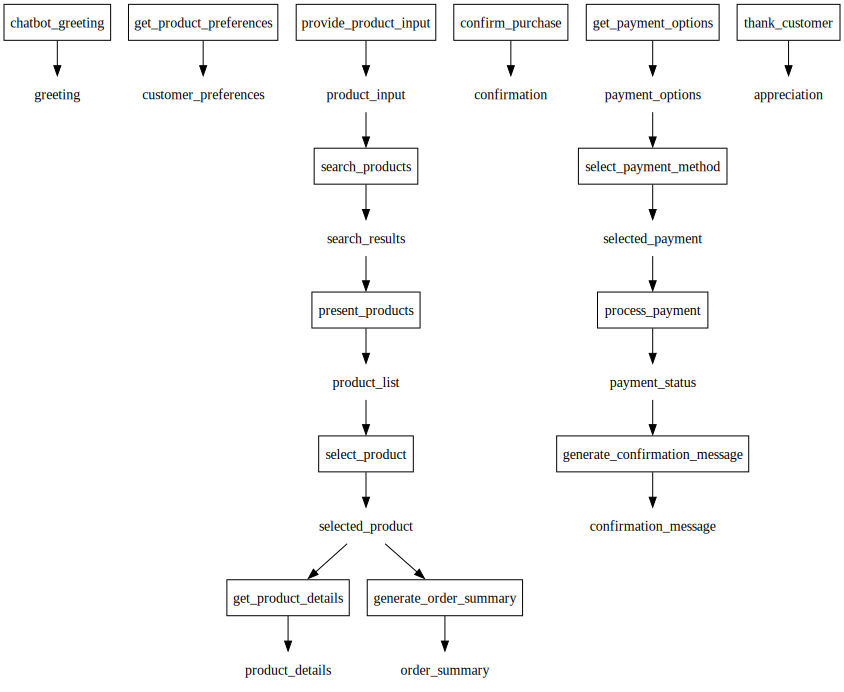

In [10]:
poc = i2i("""
A sales chatbot trained on the product descriptions of an e-commerce site, 
capable of guiding the customer through their purchases.
""")

poc.dot_digraph()


In [14]:
print(poc.specs[:600], '...')
print(poc.specs)

use_case:
  description: |
    The use case involves the interactions between the customer (actor) and the sales chatbot system to guide the customer through their purchases on an e-commerce site. 

    Basic Flow:
    1. Customer initiates a conversation with the chatbot.
    2. Chatbot greets the customer and asks about their product preferences.
    3. Customer provides product details or asks for recommendations.
    4. Chatbot uses the customer's input to search the product database.
    5. Chatbot presents the customer with relevant products or recommendations.
    6. Customer selects a  ...
use_case:
  description: |
    The use case involves the interactions between the customer (actor) and the sales chatbot system to guide the customer through their purchases on an e-commerce site. 

    Basic Flow:
    1. Customer initiates a conversation with the chatbot.
    2. Chatbot greets the customer and asks about their product preferences.
    3. Customer provides product details or 

In [13]:
print(poc.code)

def sales_chatbot():
    """Simulate the interactions between a customer and a sales chatbot system."""
    # 1. Customer initiates a conversation with the chatbot.
    greeting = chatbot_greeting()

    # 2. Chatbot greets the customer and asks about their product preferences.
    customer_preferences = get_product_preferences()

    # 3. Customer provides product details or asks for recommendations.
    product_input = provide_product_input()

    # 4. Chatbot uses the customer's input to search the product database.
    search_results = search_products(product_input)

    # 5. Chatbot presents the customer with relevant products or recommendations.
    product_list = present_products(search_results)

    # 6. Customer selects a product for purchase.
    selected_product = select_product(product_list)

    # 7. Chatbot provides detailed information about the selected product, including price, availability, and delivery options.
    product_details = get_product_details(selected_produ

In [4]:
from oa.ask import ai

specs = ai.description_to_software_specs(informal_description="""
A sales chatbot trained on the product descriptions of an e-commerce site, 
capable of guiding the customer through their purchases.
""")
print(specs)

use_case: |
  Description: The sales chatbot interacts with customers to guide them through their purchases on an e-commerce site.
  
  Actors:
    - Customer: The user who wants to make a purchase.
    - Sales Chatbot: The system that assists customers in their purchasing process.
    
  Basic Flow:
    1. Customer initiates a conversation with the sales chatbot.
    2. Sales Chatbot greets the customer and asks for their preferences.
    3. Customer provides their preferences, such as product category, price range, or specific features.
    4. Sales Chatbot analyzes the preferences and retrieves relevant product descriptions from the e-commerce site.
    5. Sales Chatbot presents the customer with a list of suggested products based on their preferences.
    6. Customer selects a product from the list or asks for further assistance.
    7. If the customer selects a product, Sales Chatbot provides detailed information about the product, including its description, price, and availabilit

In [8]:
print(poc_code)


def sales_chatbot():
    """The sales chatbot interacts with customers to guide them through their purchases on an e-commerce site."""
    # Customer initiates a conversation with the sales chatbot
    greet_customer()

    # Sales Chatbot asks for customer preferences
    customer_preferences = get_preferences()

    # Sales Chatbot analyzes the preferences
    product_descriptions = analyze_preferences(customer_preferences)

    # Sales Chatbot presents suggested products to the customer
    suggested_products = present_products(product_descriptions)

    # Customer selects a product or asks for more assistance
    selected_product = customer_interaction(suggested_products)

    # Sales Chatbot provides product details
    product_details = get_product_details(selected_product)

    # Sales Chatbot offers options to add to cart or proceed with purchase
    customer_choice = offer_options(product_details)

    # If customer selects to add product to cart, update cart
    if customer_c

In [13]:
specs = ai.description_to_software_specs(informal_description="""
A sales chatbot trained on the product descriptions of an e-commerce site, 
capable of guiding the customer through their purchases.
""")
poc_code = ai.user_story_to_code_for_dag(user_story=specs)
poc = code_to_dag(poc_code)

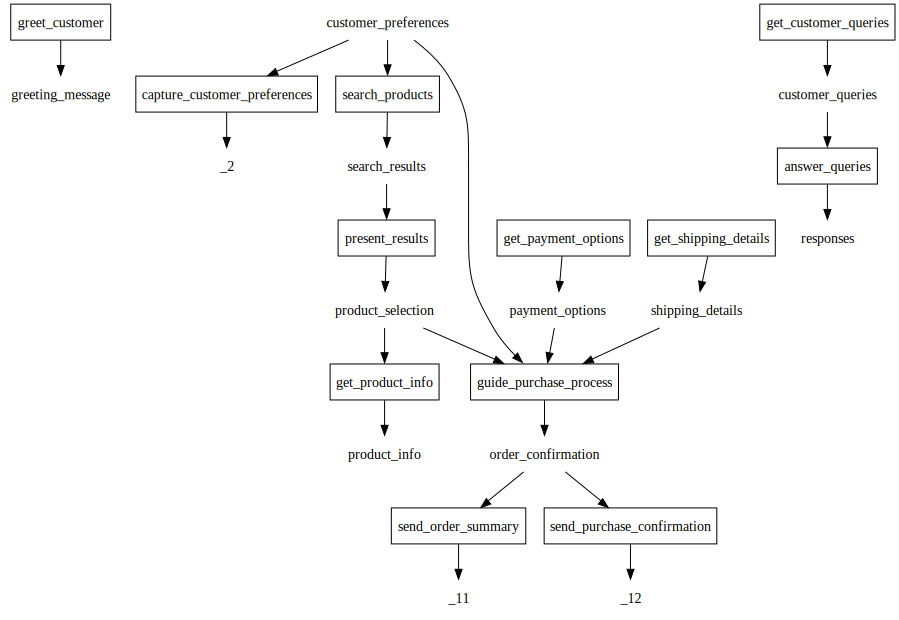

In [14]:
poc.dot_digraph()

In [17]:
from i2 import Sig
Sig(poc)
poc('adf')

('greet_customer()',
 'capture_customer_preferences(customer_preferences=adf)',
 'get_product_info(product_selection=present_results(search_results=search_products(customer_preferences=adf)))',
 'answer_queries(customer_queries=get_customer_queries())',
 'send_order_summary(order_confirmation=guide_purchase_process(customer_preferences=adf, product_selection=present_results(search_results=search_products(customer_preferences=adf)), payment_options=get_payment_options(), shipping_details=get_shipping_details()))',
 'send_purchase_confirmation(order_confirmation=guide_purchase_process(customer_preferences=adf, product_selection=present_results(search_results=search_products(customer_preferences=adf)), payment_options=get_payment_options(), shipping_details=get_shipping_details()))')

In [8]:
from oa.ask import ai

specs = ai.description_to_software_specs(informal_description="""
    An ai assistant that will help me make POCs (proof of concepts) from app ideas.
    The assistant should be able to generate some software specifications from an informal description of an app idea,
    and then generate a DAG from these specifications, 
    and finally, create simple, but functional, functions for this DAG to have the 
    expected behavior. 
    I should be able to get all of this just from my idea, but also be able to 
    edit the specifications and the DAG, and also the functions, if I want to.
""")
print(specs)

use_case:

- Description: The user interacts with the AI assistant to generate POCs from app ideas.
  - Actors: User, AI Assistant
  - Basic Flow:
    1. User provides an informal description of an app idea.
    2. AI Assistant generates software specifications based on the informal description.
    3. AI Assistant creates a directed acyclic graph (DAG) from the specifications.
    4. AI Assistant generates simple functional functions for the DAG to have the expected behavior.
    5. User can review and edit the specifications, DAG, and functions if desired.
  - Alternative Flows: 
    - User can provide additional input to clarify or modify the app idea.
    - If the generated specifications are not accurate, user can edit them and have the DAG and functions regenerated.
  - Exceptions:
    - If the informal description provided by the user is not clear or complete, the AI Assistant will prompt for additional information.

functional_specification:

- Description: Specify the function

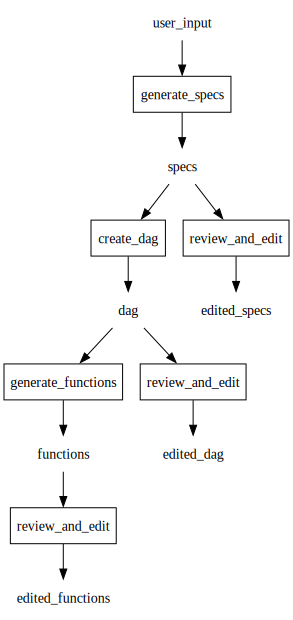

In [10]:
from oa.ask import ai
from meshed import code_to_dag
poc_code = ai.user_story_to_code_for_dag(user_story=specs)
poc_dag = code_to_dag(poc_code)
poc_dag.dot_digraph()

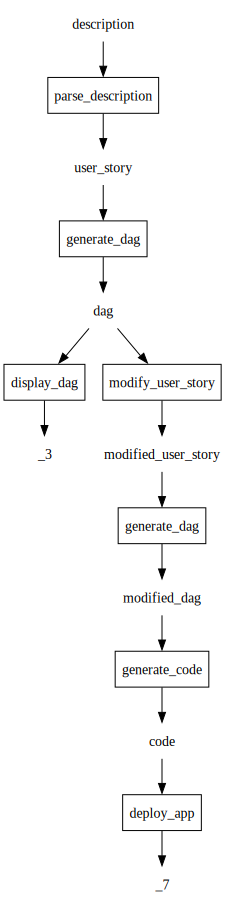

In [7]:
from oa.ask import ai
from meshed import code_to_dag

user_story = """
A user can easily make POCs from textual descriptions of their ideas. 

A user enters a textual description of their idea and the system generates 
some POC code. 

This POC code can be parsed by meshed.code_to_dag to generate a DAG of the user story
that relates the different functions (usually representing user actions) 
and datas involved in the user story, along with their relations. 

The dag can be displayed and used to modify the user story, making a new user story.

The dag can also be used to generate and deploy a fully-functional app, 
including a UI, a database, and a backend.

The functions used in the DAG in the first POC generated are only placeholders.
They are functional, but they don't do anything relevant to their actual role. 
A user can change this by asking the system to generate code for each individual 
function of the dag (with or without further context than the context already 
generated thus far by the expression of the user story, the DAG, etc.). 
The user can view, test, and modify the code generated for each function,
and finally inject it in the DAG, replacing the placeholder function, 
and redeploy the app.
"""
poc_code = ai.user_story_to_code_for_dag(user_story=user_story)
poc_dag = code_to_dag(poc_code)
poc_dag.dot_digraph()

In [6]:
print(poc_code)

def generate_poc_code(user_idea: str) -> str:
    """Generate a simple POC code based on a user's textual idea."""
    # Generate a placeholder POC code
    poc_code = f"""
def poc_code_generator(user_idea: str) -> str:
    # Placeholder code for generating POC code
    idea_description = user_idea
    generate_dag(idea_description)
    return "Placeholder POC code"
"""
    return poc_code


Let's start with some simple user story:
* A user can select some learner class and parameters, and make a learner
* The user can select some data and splits it into train and test sets
* The user can train/fit a learner with some train data, thus making a model
* The user can get results via applying some test data to the model

In [4]:
from i2 import Sig
Sig(ai.user_story_to_code_for_dag)

<Sig (*, user_story)>

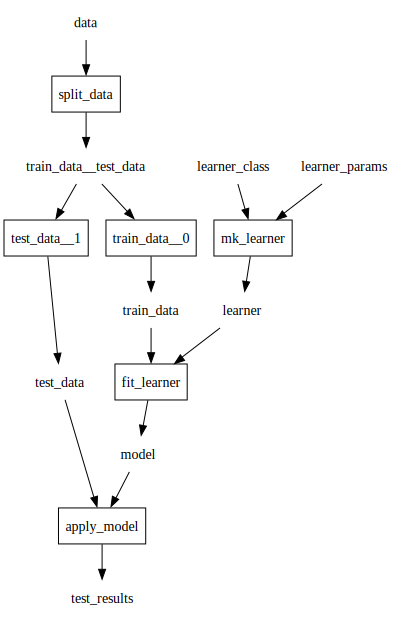

In [32]:
from meshed import code_to_dag

@code_to_dag
def poc(data: list, learner_params: dict = {}):
    """Perform the basic ML operations on the data.

    :param data: The data to be used. Should be a list of dicts.
    """
    learner = mk_learner(learner_class, params=learner_params)
    
    # Split the data into training and test sets
    train_data, test_data = split_data(data)

    # Train the model
    model = fit_learner(learner, train_data)

    test_results = apply_model(model, test_data)

poc.dot_digraph()


In [43]:
import oa

In [31]:
from meshed import code_to_dag

@code_to_dag
def poc(data: list, learner_params: dict):
    """Perform the basic ML operations on the data.

    :param data: The data to be used. Should be a list of dicts.
    """
    learner = mk_learner(learner_class, learner_params)
    train_data, test_data = split_data(data)
    model = fit_learner(learner, train_data)
    test_results = apply_model(model, test_data)

In [3]:
from i2 import Sig
Sig(poc)

<Sig (learner_class, learner_params, data)>

In [7]:
poc("LEARNER", "PARAMS", "DATA")

'apply_model(model=fit_learner(learner=mk_learner(learner_class=LEARNER, learner_params=PARAMS), train_data=s), test_data=p)'

In [ ]:
from py2http.service import run_app

routes = [{'endpoint': fn.func, 'name': fn.name} for fn in poc.func_nodes]
run_app(routes, publish_openapi=True, publish_swagger=True)

In [18]:
def new_mk_learner(learner_class, learner_params):
    return f"Hello {learner_class}! Here are your params: {learner_params}"

poc2 = poc.ch_funcs(mk_learner=new_mk_learner)

poc2(1,2,3)

'apply_model(model=fit_learner(learner=Hello 1! Here are your params: 2, train_data=s), test_data=p)'

In [20]:
from py2http.service import run_app

routes = [{'endpoint': fn.func, 'name': fn.name} for fn in poc2.func_nodes]
# run_app(routes, publish_openapi=True, publish_swagger=True)

# Scaffold to functions, data, and test

In [ ]:
from i2 import Sig

In [21]:
from oa.ask import ai
__import__('importlib').reload(__import__('oa'))
list(ai)

['user_story_to_code_for_dag',
 'make_synopsis',
 'description_to_software_specs',
 'define_jargon',
 'suggest_names',
 'specs_to_code_for_dag']

In [2]:
from qo import reload_module
reload_module('oa')
from oa.ask import ai
list(ai)

user_story_to_code_for_dag
make_synopsis
description_to_software_specs
define_jargon
simple_tests_for_code
suggest_names
specs_to_code_for_dag


['user_story_to_code_for_dag',
 'make_synopsis',
 'description_to_software_specs',
 'define_jargon',
 'simple_tests_for_code',
 'suggest_names',
 'specs_to_code_for_dag']

In [4]:
ai.reload()
ai.print_signatures()


user_story_to_code_for_dag(user_story)
make_synopsis(text, *, adjective=' ', text_kind=' ', extras=' ')
description_to_software_specs(informal_description)
define_jargon(context, *, words)
simple_tests_for_code(code_to_test, *, context_specs=' ', context_code=' ')
suggest_names(thing, *, n='30', min_length='1', max_length='15')
specs_to_code_for_dag(specs)


In [10]:
def greet_user():
    user_id = get_user_id()
    user_name = get_user_name(user_id, users_dict)
    display_greeting(user_name)

from inspect import getsource

print(getsource(greet_user))

def greet_user():
    user_id = get_user_id()
    user_name = get_user_name(user_id, users_dict)
    display_greeting(user_name)



In [5]:
def access_control():
    username = get_username()
    password = get_password()
    hashed_password = hash_password(password)
    has_access = check_access(username, hashed_password, users_db)
    
from inspect import getsource

t = ai.simple_tests_for_code(getsource(access_control))
print(t)

# --- Functions ---

def get_username():
    return "admin"

def get_password():
    return "password"

def hash_password(password):
    return password[::-1]

def check_access(username, password, users_db):
    if username in users_db:
        if users_db[username] == password:
            return True
    return False


# --- Data ---

users_db = {
    "admin": "drowssap",
    "user1": "pass1",
    "user2": "pass2"
}

# --- Example Usage and Test ---

username = get_username()
assert username == "admin"

password = get_password()
assert password == "password"

hashed_password = hash_password(password)
assert hashed_password == "drowssap"

has_access = check_access(username, hashed_password, users_db)
assert has_access == True




In [7]:
t = ai.simple_tests_for_code(
    getsource(access_control),
    context_specs="""
    Passwords are hashed using the SHA256 algorithm and dbs are represented by dicts
    """
)
print(t)

# --- Functions ---

import hashlib

def get_username():
    return "admin"

def get_password():
    return "password"

def hash_password(password):
    hashed_password = hashlib.sha256(password.encode()).hexdigest()
    return hashed_password

def check_access(username, hashed_password, users_db):
    if username in users_db:
        if users_db[username] == hashed_password:
            return True
    return False


# --- Data ---

users_db = {
    "admin": "5c5fc7b8b0452cbf34fdcc0e5e33e8a6f1856fbb9761a8b37a7f98663b657842",
    "guest": "7e3ba4a723f63916e2a09b7d3d40c4146e9d2a9be5d7cc2f7d380a22f039166e"
}


# --- Example Usage and Test ---

username = get_username()
assert username == "admin"

password = get_password()
assert password == "password"

hashed_password = hash_password(password)
assert hashed_password == "5c5fc7b8b0452cbf34fdcc0e5e33e8a6f1856fbb9761a8b37a7f98663b657842"

has_access = check_access(username, hashed_password, users_db)
assert has_access == True

print("Access

In [18]:
# --- Functions ---

import hashlib

def get_username():
    return "admin"

def get_password():
    return "password"

def hash_password(password):
    hashed_password = hashlib.sha256(password.encode()).hexdigest()
    return hashed_password

def check_access(username, hashed_password, users_db):
    if username in users_db:
        if users_db[username] == hashed_password:
            return True
    return False


# --- Data ---

users_db = {
    "admin": hash_password(get_password()),
    "guest": hash_password("1234")
}
# users_db = {
#     "admin": "5c5fc7b8b0452cbf34fdcc0e5e33e8a6f1856fbb9761a8b37a7f98663b657842",
#     "guest": "7e3ba4a723f63916e2a09b7d3d40c4146e9d2a9be5d7cc2f7d380a22f039166e"
# }


# --- Example Usage and Test ---

username = get_username()
assert username == "admin"

password = get_password()
assert password == "password"

hashed_password = hash_password(password)
# assert hashed_password == "5c5fc7b8b0452cbf34fdcc0e5e33e8a6f1856fbb9761a8b37a7f98663b657842"
# Corrected:
assert hashed_password == "5e884898da28047151d0e56f8dc6292773603d0d6aabbdd62a11ef721d1542d8"

has_access = check_access(username, hashed_password, users_db)
assert has_access == True

print("Access granted!")


Access granted!


In [11]:
hashed_password

'5e884898da28047151d0e56f8dc6292773603d0d6aabbdd62a11ef721d1542d8'

# Functions to webservices

In [1]:
from py2http.service import run_app

# Define or import functions
def add(a, b):
    return a + b

def multiply(a, b):
    return a * b

class Divider:
    def __init__(self, dividend):
        self.dividend = dividend
    
    def divide(self, divisor):
        return self.dividend / divisor

divider_from_ten = Divider(10)

# Make a list of functions or instance methods
func_list = [add, multiply, divider_from_ten.divide]

# Create an HTTP server
run_app(func_list, publish_openapi=True, publish_swagger=True)

Bottle v0.12.25 server starting up (using GunicornServer(certfile=None, keyfile=None))...
Listening on http://localhost:3030/
Hit Ctrl-C to quit.

[2023-11-23 12:57:55 +0100] [34046] [INFO] Starting gunicorn 20.1.0
[2023-11-23 12:57:55 +0100] [34046] [INFO] Listening at: http://127.0.0.1:3030 (34046)
[2023-11-23 12:57:55 +0100] [34046] [INFO] Using worker: sync
[2023-11-23 12:57:55 +0100] [34059] [INFO] Booting worker with pid: 34059


app_spec=[<function add at 0x104ad4700>, <function multiply at 0x104ad4c10>, <bound method Divider.divide of <__main__.Divider object at 0x104ac2b30>>]
[<function add at 0x104ad4700>, <function multiply at 0x104ad4c10>, <bound method Divider.divide of <__main__.Divider object at 0x104ac2b30>>]


## Controlling the way it's done

In [22]:
poc.func_nodes

[FuncNode( -> greet_customer -> greeting_message),
 FuncNode(customer_preferences -> capture_customer_preferences -> _2),
 FuncNode(customer_preferences -> search_products -> search_results),
 FuncNode(search_results -> present_results -> product_selection),
 FuncNode(product_selection -> get_product_info -> product_info),
 FuncNode( -> get_customer_queries -> customer_queries),
 FuncNode(customer_queries -> answer_queries -> responses),
 FuncNode( -> get_payment_options -> payment_options),
 FuncNode( -> get_shipping_details -> shipping_details),
 FuncNode(customer_preferences,product_selection,payment_options,shipping_details -> guide_purchase_process -> order_confirmation),
 FuncNode(order_confirmation -> send_order_summary -> _11),
 FuncNode(order_confirmation -> send_purchase_confirmation -> _12)]

In [1]:
# from py2http import run_app, mk_app

# funcs = list(foo.find_funcs())
# named_funcs = {fn.name: fn.func for fn in foo.func_nodes}
# # mk_app(funcs)


In [3]:

handlers = [
    dict(
        endpoint=lambda x, y: x + y,
        name='add',
    ),
    dict(
        endpoint=lambda x, y: x * y,
        name='multiply',
    ),
]

from py2http import run_app, mk_app

app = mk_app(handlers, publish_openapi=True, publish_swagger=True)
app.routes

[<POST '/add' <LocalRequest: GET http://127.0.0.1/>>,
 <POST '/multiply' <LocalRequest: GET http://127.0.0.1/>>,
 <GET '/ping' <function mk_bottle_app.<locals>.<lambda> at 0x106115900>>,
 <GET '/openapi' {'openapi': '3.0.2', 'info': {'title': 'default', 'version': '0.1'}, 'servers': [{'url': 'http://localhost:3030'}], 'paths': {'/add': {'post': {'x-method_name': 'add', 'description': '', 'requestBody': {'required': True, 'content': {'application/json': {'schema': {'type': 'object', 'properties': {'x': {'type': '{}'}, 'y': {'type': '{}'}}, 'required': ['x', 'y']}}}}, 'responses': {'200': {'description': '', 'content': {'application/json': {'schema': {}}}}}}}, '/multiply': {'post': {'x-method_name': 'multiply', 'description': '', 'requestBody': {'required': True, 'content': {'application/json': {'schema': {'type': 'object', 'properties': {'x': {'type': '{}'}, 'y': {'type': '{}'}}, 'required': ['x', 'y']}}}}, 'responses': {'200': {'description': '', 'content': {'application/json': {'schem

In [5]:
# app.run()

In [7]:
from i2 import Sig

def add(x, y):
    return x + y

def multiply(x: int, y: int):
    return x * y

handlers = [
    dict(
        endpoint=add,
        name='adder',
        # attr_names=Sig(add).names
    ),
    dict(
        endpoint=multiply,
        name='multiplier',
        # attr_names=Sig(multiply).names
    ),
]


from py2http import run_app, mk_app

# run_app([add, multiply], publish_openapi=True, publish_swagger=True)

app = mk_app(handlers, publish_openapi=True, publish_swagger=True)
print(dir(app))

['_Bottle__hook_names', '_Bottle__hook_reversed', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cast', '_handle', '_hooks', 'add_hook', 'add_route', 'catchall', 'close', 'config', 'default_error_handler', 'delete', 'error', 'error_handler', 'get', 'get_url', 'hook', 'install', 'match', 'merge', 'mount', 'openapi_spec', 'plugins', 'post', 'put', 'remove_hook', 'reset', 'resources', 'route', 'router', 'routes', 'run', 'trigger_hook', 'uninstall', 'wsgi']


In [8]:
app.routes

[<POST '/adder' <LocalRequest: POST http://127.0.0.1:8080/add>>,
 <POST '/multiplier' <LocalRequest: POST http://127.0.0.1:8080/add>>,
 <GET '/ping' <function mk_bottle_app.<locals>.<lambda> at 0x10622a7a0>>,
 <GET '/openapi' {'openapi': '3.0.2', 'info': {'title': 'default', 'version': '0.1'}, 'servers': [{'url': 'http://localhost:3030'}], 'paths': {'/adder': {'post': {'x-method_name': 'adder', 'description': '', 'requestBody': {'required': True, 'content': {'application/json': {'schema': {'type': 'object', 'properties': {'x': {'type': '{}'}, 'y': {'type': '{}'}}, 'required': ['x', 'y']}}}}, 'responses': {'200': {'description': '', 'content': {'application/json': {'schema': {}}}}}}}, '/multiplier': {'post': {'x-method_name': 'multiplier', 'description': '', 'requestBody': {'required': True, 'content': {'application/json': {'schema': {'type': 'object', 'properties': {'x': {'type': 'integer'}, 'y': {'type': 'integer'}}, 'required': ['x', 'y']}}}}, 'responses': {'200': {'description': '',

In [9]:
app.run()

Bottle v0.12.25 server starting up (using WSGIRefServer())...
Listening on http://127.0.0.1:8080/
Hit Ctrl-C to quit.

127.0.0.1 - - [27/Nov/2023 10:00:32] "GET /swagger HTTP/1.1" 200 1173
127.0.0.1 - - [27/Nov/2023 10:00:32] "GET /swagger/swagger.json HTTP/1.1" 200 829
127.0.0.1 - - [27/Nov/2023 10:00:44] "POST /multiplier HTTP/1.1" 200 1


Traceback (most recent call last):
  File "/Users/thorwhalen/Dropbox/py/proj/i/py2http/py2http/service.py", line 125, in handle_request
    return func(req)
  File "/Users/thorwhalen/Dropbox/py/proj/i/py2http/py2http/service.py", line 148, in sync_handle_request
    inputs = input_mapper(req)
  File "/Users/thorwhalen/Dropbox/py/proj/i/py2http/py2http/decorators.py", line 1017, in input_mapper
    inputs = _get_inputs_from_request(req, content_type)
  File "/Users/thorwhalen/Dropbox/py/proj/i/py2http/py2http/decorators.py", line 1173, in _get_inputs_from_request
    inputs = request.json
  File "/Users/thorwhalen/.pyenv/versions/3.10.8/lib/python3.10/site-packages/bottle.py", line 178, in __get__
    if key not in storage: storage[key] = self.getter(obj)
  File "/Users/thorwhalen/.pyenv/versions/3.10.8/lib/python3.10/site-packages/bottle.py", line 1139, in json
    return json_loads(b)
  File "/Users/thorwhalen/.pyenv/versions/3.10.8/lib/python3.10/site-packages/bottle.py", line 103, i

127.0.0.1 - - [27/Nov/2023 10:01:03] "POST /adder HTTP/1.1" 500 89


In [ ]:
handlers = [
    dict(
        endpoint=lambda x, y: x + y,
        name='adder',
    ),
    dict(
        endpoint=lambda x, y: x * y,
        name='multiplier',
    ),
]


from py2http import run_app, mk_app

# run_app([add, multiply], publish_openapi=True, publish_swagger=True)

run_app(handlers, publish_openapi=True, publish_swagger=True)

# Scrap

In [1]:
from oa.ask import ai
list(ai)

['user_story_to_code_for_dag',
 'make_synopsis',
 'description_to_software_specs',
 'define_jargon',
 'simple_tests_for_code',
 'suggest_names',
 'specs_to_code_for_dag']

In [3]:
print(ai.suggest_names("A product that will help me make POCs from app ideas"))

IdeaMaker
AppCraft
ProtoGenius
RapidIdeas
AppGuru
POCGenie
ConceptX
AppProto
IdeaForge
POCBuilder
ProtoMaker
MindSpark
AppVenture
IdeaPro
RapidProto
AppMock
ConceptLab
IdeaExpress
POCMaker
ProtoMaster
AppInvent
IdeaGen
RapidConcept
AppStart
POCWizard
ProtoLab
IdeaLab
ConceptMaker
AppXpress


In [ ]:
import cosmograph